In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
sns.set()

### Create some simulated data
n = 100, ß₀ = -1 and ß₁ = 0.5

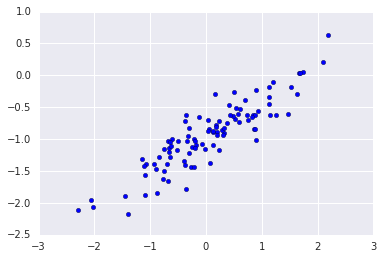

In [2]:
np.random.seed(1)
x = np.random.randn(100)
eps = np.random.randn(100) * .25
y = -1 + .5 * x + eps
df = pd.DataFrame({'x' : x, 'y' : y})
plt.scatter(x, y);

### Linear model

In [3]:
fit = sm.ols("y ~ x", df).fit()
fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.798   
Dependent Variable: y                AIC:                -4.3816 
Date:               2017-11-24 13:19 BIC:                0.8288  
No. Observations:   100              Log-Likelihood:     4.1908  
Df Model:           1                F-statistic:        391.4   
Df Residuals:       98               Prob (F-statistic): 5.39e-36
R-squared:          0.800            Scale:              0.054941
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -0.9632    0.0235  -40.9990  0.0000  -1.0099  -0.9166
x             0.5239    0.0265   19.7826  0.0000   0.4713   0.5764
-----------------------------------------------------------------
Omnibus:               0.898        Durbin-Watson:          2.157
Prob(Omnibus):         0.638        Jarque-Bera (JB):       0.561
Skew:                  -0.172       Prob(JB):               0.755
Kurtosis:              3.127        Condition No.:          1    
=================================================================

"""

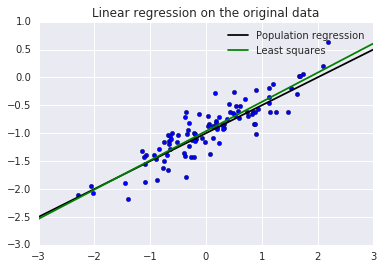

In [4]:
def plot_regression(title, fit) :
    plt.scatter(x, y);
    x_line = np.array([-3, 3])

    y_line_population = -1 + .5 * x_line
    plt.plot(x_line, y_line_population, 'black', label='Population regression')

    y_line_OLS = fit.predict(pd.DataFrame({'x' : [-3, 3]}))
    plt.plot(x_line, y_line_OLS, 'g', label='Least squares')

    plt.axis([-3, 3, -3, 1])
    plt.title(title)
    plt.legend()
    plt.show();
    
plot_regression('Linear regression on the original data', fit)

### Polynomial regression model

In [5]:
fitPolynomial = sm.ols("y ~ x + np.power(x,2)", df).fit()
fitPolynomial.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.796   
Dependent Variable: y                AIC:                -2.4155 
Date:               2017-11-24 13:19 BIC:                5.4001  
No. Observations:   100              Log-Likelihood:     4.2077  
Df Model:           2                F-statistic:        193.8   
Df Residuals:       97               Prob (F-statistic): 1.32e-34
R-squared:          0.800            Scale:              0.055489
-----------------------------------------------------------------
                  Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -0.9663   0.0289 -33.4855 0.0000 -1.0235 -0.9090
x                 0.5234   0.0267  19.5821 0.0000  0.4704  0.5765
np.power(x, 2)    0.0039   0.0213   0.1813 0.8565 -0.0383  0.0461
-----------------------------------------------------------------
Omnibus:               0.893        Durbin-Watson:          2.152
Prob(Omnibus):         0.640        Jarque-Bera (JB):       0.552
Skew:                  -0.170       Prob(JB):               0.759
Kurtosis:              3.132        Condition No.:          2    
=================================================================

"""

The p-value for the quadratic term is 0.86, there is no evidence that it improves the model fit.

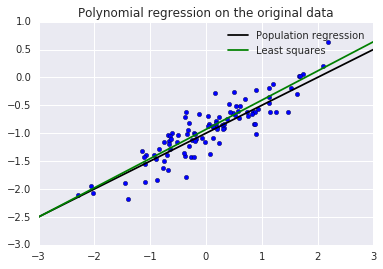

In [6]:
plot_regression('Polynomial regression on the original data', fitPolynomial)